In [1]:
import numpy as np
from visualize_grid import visualize_grid
# generate data
m,n = (5,5) # grid size

In [2]:
from ShortestPathGrid import ShortestPathGrid
cost = np.arange((m-1)*n + m*(n-1))
np.random.shuffle(cost)
grid = ShortestPathGrid(m, n, cost=cost)

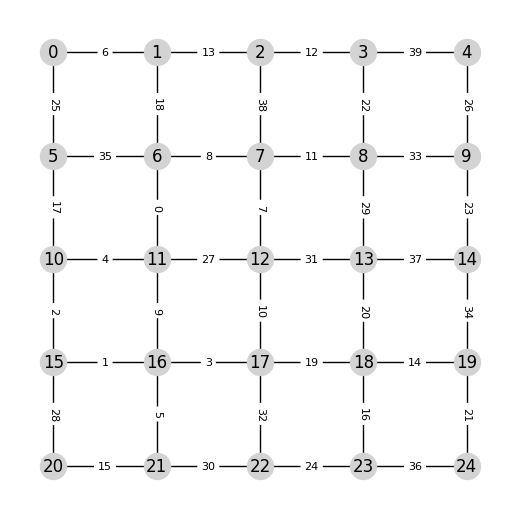

In [3]:
grid.visualize()

In [4]:
# Set source and target of optimization
s = 1 # source node
t = 23 # target node
# Solve the shortest path problem
sol, obj = grid.solve(source=s, target=t)

Optimal objective: 63


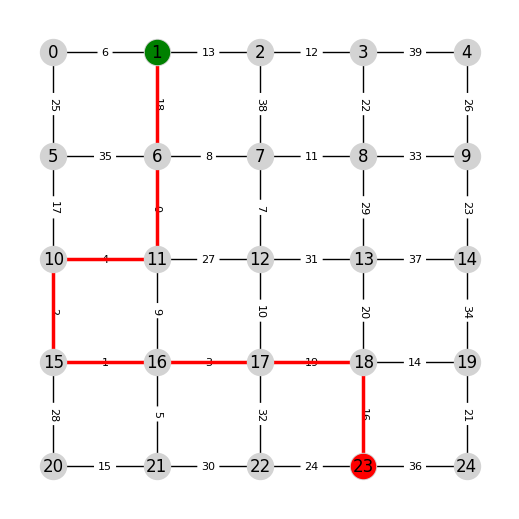

In [5]:
# Visualize the solution
grid.visualize(s = s, t = t, color_edges=sol)
print("Optimal objective:", obj)

In [6]:
import pyepo

# Set parameters for data generation
num_train_data = 1000 # number of training data
num_test_data = 1000 # number of test data
num_feat = 5 # size of feature
deg = 4 # polynomial degree
e = 0.5 # noise width

# Generate data for shortest path problem
feats, costs = pyepo.data.shortestpath.genData(num_train_data+num_test_data, num_feat, (m,n), deg=deg, noise_width=e, seed=135)

In [7]:
# split train test data
from sklearn.model_selection import train_test_split
x_train, x_test, c_train, c_test = train_test_split(feats, costs, test_size=num_test_data, random_state=42)

In [8]:
from LinearRegression import LinearRegression

# Instantiate linear regression model
model = LinearRegression(num_feat=num_feat, num_edges=grid.get_num_edges())

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# 3. Choose loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [10]:
# Data loading
train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(c_train).float())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
test_data = torch.utils.data.TensorDataset(torch.from_numpy(x_test).float(), torch.from_numpy(c_test).float())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True)

In [11]:
from trainer import Trainer

# # 2) Build your two‐stage network:
# #    e.g. lr = LinearRegression(...); opt = ShortestPath(...)
# #    maybe wrap them in a single nn.Module
# model = MyOptNetPipeline(linear_model=model, opt_model=opt)

# 4) Train
trainer = Trainer(model, optimizer, criterion)
train_loss, test_loss = trainer.fit(train_loader, test_loader)


Epoch 000 | Train Loss: 1.4606 | Val Loss: 1.4933
Epoch 010 | Train Loss: 0.7593 | Val Loss: 0.7972
Epoch 020 | Train Loss: 0.4426 | Val Loss: 0.4792
Epoch 030 | Train Loss: 0.2991 | Val Loss: 0.3328
Epoch 040 | Train Loss: 0.2337 | Val Loss: 0.2651
Epoch 050 | Train Loss: 0.2038 | Val Loss: 0.2332
Epoch 060 | Train Loss: 0.1901 | Val Loss: 0.2183
Epoch 070 | Train Loss: 0.1838 | Val Loss: 0.2111
Epoch 080 | Train Loss: 0.1808 | Val Loss: 0.2075
Epoch 090 | Train Loss: 0.1795 | Val Loss: 0.2058
Epoch 100 | Train Loss: 0.1789 | Val Loss: 0.2049


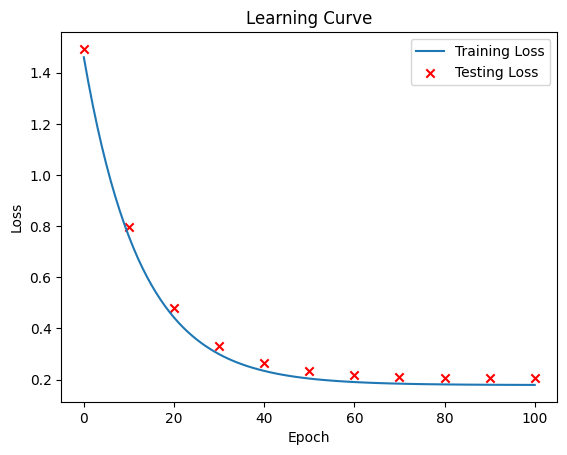

In [13]:
import matplotlib.pyplot as plt

# 6. (Optional) Plot learning curve
plt.plot(train_loss, label='Training Loss')
if test_loss:
    plt.scatter(np.arange(len(test_loss))*trainer.n_epochs, test_loss, marker='x', color='red', label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()